<a href="https://colab.research.google.com/github/doouv/2025-KIChe-PSE-Summer-School-Tutorial/blob/main/Hands_on_practice_Knapsack_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **üö© Introduction**
*   This colab is design to solve the knapsack problem by reinforcement learning.
*   The original code and the attached data is from Prof. JongWoo Kim; this version was updated for **the 2025 KiChe PSE Summer School** by TA [Hayoung Doo](https://github.com/doouv/2025-KIChe-PSE-Summer-School-Tutorial) with academic supervision from [Prof. Jongeol Na](https://nagroup.ewha.ac.kr/).

> Library: [Ray-RLlib](https://docs.ray.io/en/latest/rllib/index.html), [Gymnasium](https://gymnasium.farama.org/index.html)


## üéØ **What's knapsack problem?**
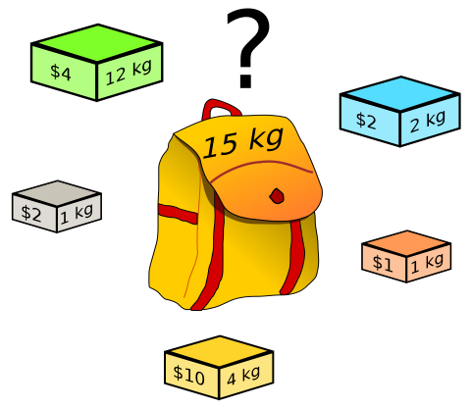

Imagine a traveler with a backpack that can hold up to a fixed maximum weight. There are several items, each with its own value and weight. The goal is to choose a combination of items that maximizes the total value without exceeding the weight limit.

### Example)
*   Knapsack capacity: 20kg
*   Item A: 5kg, $30

*   Item B: 10kg, $50

*   Item C: 15kg, $60

*   Item D: 8kg, $40

**Goal**: Maximize the value within 20kg!



# üì• **Installations & Data loading**

In reinforcement learning (RL), we often use **RLlib** to implement and scale algorithms for training agents,
and **Gymnasium** to provide standardized environments for testing and evaluation. Figuratively, RLlib trains the agent, while Gymnasium provides the environment to practice in.

<img src="https://drive.google.com/uc?export=view&id=1fi1Glr2bkmhxTOUzBGvpCx-iVKdj3APe" width="400">

In [ ]:
!pip install ray[rllib]
!pip install gymnasium

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 958.1/958.1 kB 11.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 220.9/220.9 kB 20.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 40.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 70.1/70.1 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found e

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
from gymnasium import spaces, logger
from gymnasium.utils import seeding

### **Load `.csv` data**

In [ ]:
!wget "https://drive.google.com/uc?id=1ew79j0FrZhc8pnhDoAAoBduBFm6YvG4S" -O newenv.csv

--2025-08-20 03:09:51--  https://drive.google.com/uc?id=1ew79j0FrZhc8pnhDoAAoBduBFm6YvG4S
Resolving drive.google.com (drive.google.com)... 192.178.219.139, 192.178.219.101, 192.178.219.100, ...
Connecting to drive.google.com (drive.google.com)|192.178.219.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ew79j0FrZhc8pnhDoAAoBduBFm6YvG4S [following]
--2025-08-20 03:09:51--  https://drive.usercontent.google.com/download?id=1ew79j0FrZhc8pnhDoAAoBduBFm6YvG4S
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1855 (1.8K) [application/octet-stream]
Saving to: ‚Äònewenv.csv‚Äô

newenv.csv          100%[===================>]   1.81K  --.-KB/s    in 0s      

2025-08-20 03:09:52 (23.5 MB/s

In [ ]:
df = pd.read_csv('/content/newenv.csv', header=0, index_col=0)
df.head()

weights  values
0       12      73
1       96      48
2       43      59
3       52      45
4       30       7

# **üåè Environment setting**

<img src="https://drive.google.com/uc?export=view&id=17jJdaaLF3Jr8erOz4pKd3_eXhbYXNAsA" width="750">

### Helper funciton

In [ ]:
def assign_env_config(self, kwargs):
    for key, value in kwargs.items():
        setattr(self, key, value)

### Classes for environment

In [ ]:
class KnapsackEnv(gym.Env):
    '''
    Unbounded Knapsack Problem
    The Knapsack Problem (KP) is a combinatorial optimization problem which
    requires the user to select from a range of goods of different values and
    weights in order to maximize the value of the selected items within a
    given weight limit. This version is unbounded meaning that we can select
    items without limit.
    '''

    def __init__(self, *args, **kwargs):
        super().__init__()
        # Basic parameters
        self.N = 200
        self.max_weight = 200
        self.current_weight = 0
        self.mask = True
        self.item_numbers = np.arange(self.N)
        self.over_packed_penalty = 0
        self.randomize_params_on_reset = False

        # Add env_config, if any
        assign_env_config(self, kwargs)
        self.item_numbers = np.arange(self.N)

        # Load data from CSV
        self._load_data()

        # Define observation and action spaces
        obs_space = spaces.Box(
            0, self.max_weight, shape=(2 * self.N + 1,), dtype=np.int16)
        self.action_space = spaces.Discrete(self.N)

        if self.mask:
            self.observation_space = spaces.Dict({
                "action_mask": spaces.Box(0, 1, shape=(self.N,)),
                "avail_actions": spaces.Box(0, 1, shape=(self.N,)),
                "state": obs_space
            })
        else:
            self.observation_space = spaces.Box(
                0, self.max_weight, shape=(2, self.N + 1), dtype=np.int16)

        self.reset()

    def _load_data(self):
        """Load item weights and values from CSV file"""
        df = pd.read_csv('newenv.csv')
        all_weights = df['weights'].values
        all_values = df['values'].values

        if self.N <= len(all_weights):
            self.item_weights = all_weights[:self.N]
            self.item_values = all_values[:self.N]
        else:
            repeats = (self.N // len(all_weights)) + 1
            self.item_weights = np.tile(all_weights, repeats)[:self.N]
            self.item_values = np.tile(all_values, repeats)[:self.N]

        print(f"Loaded {self.N} items with max_weight={self.max_weight}")

    def _STEP(self, item):
        # Check that item will fit
        if self.item_weights[item] + self.current_weight <= self.max_weight:
            self.current_weight += self.item_weights[item]
            reward = self.item_values[item]
            done = (self.current_weight == self.max_weight)
        else:
            # End trial if over weight
            reward = self.over_packed_penalty
            done = True

        self._update_state()
        return self.state, reward, done, {}

    def _update_state(self):
        if self.mask:
            mask = np.where(self.current_weight + self.item_weights > self.max_weight,
                            0, 1)
            state = np.hstack([
                self.item_weights,
                self.item_values,
                np.array([self.current_weight])
            ])
            self.state = {
                "action_mask": mask,
                "avail_actions": np.ones(self.N),
                "state": state
            }
        else:
            state = np.vstack([
                self.item_weights,
                self.item_values])
            self.state = np.hstack([
                state,
                np.array([
                    [self.max_weight],
                    [self.current_weight]])
            ])

    def _RESET(self):
        if self.randomize_params_on_reset:
            self.item_weights = np.random.randint(1, 100, size=self.N)
            self.item_values = np.random.randint(0, 100, size=self.N)
        self.current_weight = 0
        self._update_state()
        return self.state

    def sample_action(self):
        return np.random.choice(self.item_numbers)

    def set_seed(self, seed=None):
        if seed is None:
            seed = np.random.randint(0, np.iinfo(np.int32).max)
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self, seed=None, options=None):
        # Gymnasium 1.0.0 expects seed and options parameters
        if seed is not None:
            self.set_seed(seed)
        obs = self._RESET()
        info = {}
        return obs, info

    def step(self, action):
        obs, reward, terminated, info = self._STEP(action)
        # Gymnasium 1.0.0 expects (obs, reward, terminated, truncated, info)
        truncated = False
        return obs, reward, terminated, truncated, info

In [ ]:
class BinaryKnapsackEnv(KnapsackEnv):
    '''
    Binary Knapsack Problem
    The Binary or 0-1 KP allows selection of each item only once or not at all.
    '''

    def __init__(self, *args, **kwargs):
        self.item_limits = None
        super().__init__(*args, **kwargs)

        self.item_limits = np.ones(self.N)
        self.steps_taken = 0
        self.max_steps = self.N * 2  # ÏµúÎåÄ Ïä§ÌÖù Ïàò (ÏïàÏ†ÑÏû•Ïπò)

        obs_space = spaces.Box(
            0, self.max_weight, shape=(3, self.N + 1), dtype=np.int32)
        if self.mask:
            self.observation_space = spaces.Dict({
                "action_mask": spaces.Box(0, 1, shape=(self.N,), dtype=np.float32),
                "avail_actions": spaces.Box(0, 1, shape=(self.N,), dtype=np.float32),
                "state": obs_space
            })
        else:
            self.observation_space = obs_space

        self.reset()

        print("item weights:" + str(self.item_weights))
        print("item values:" + str(self.item_values))

    def _STEP(self, item):
        self.steps_taken += 1

        # 1. Î®ºÏ†Ä ÌòÑÏû¨ Ïú†Ìö®Ìïú Ïï°ÏÖòÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
        can_fit = self.current_weight + self.item_weights <= self.max_weight
        available = self.item_limits > 0
        valid_actions = can_fit & available
        has_valid_actions = np.any(valid_actions)

        # 2. ÏÑ†ÌÉùÎêú Ïï°ÏÖòÏù¥ Ïú†Ìö®ÌïúÏßÄ ÌôïÏù∏
        is_valid_action = (self.item_limits[item] > 0 and
                          self.item_weights[item] + self.current_weight <= self.max_weight)

        if is_valid_action:
            # Valid action - ÏïÑÏù¥ÌÖú Ï∂îÍ∞Ä
            self.current_weight += self.item_weights[item]
            reward = self.item_values[item]
            self._update_state(item)

            # ÏóÖÎç∞Ïù¥Ìä∏ ÌõÑ Îã§Ïãú ÌôïÏù∏
            can_fit = self.current_weight + self.item_weights <= self.max_weight
            available = self.item_limits > 0
            valid_actions = can_fit & available
            has_valid_actions = np.any(valid_actions)

            # Îçî Ïù¥ÏÉÅ Ïú†Ìö®Ìïú Ïï°ÏÖòÏù¥ ÏóÜÍ±∞ÎÇò ÏµúÎåÄ Ïä§ÌÖù ÎèÑÎã¨Ïãú Ï¢ÖÎ£å
            done = (not has_valid_actions) or (self.steps_taken >= self.max_steps)

        else:
            # Invalid action
            if not has_valid_actions:
                # Ïú†Ìö®Ìïú Ïï°ÏÖòÏù¥ ÏóÜÎäîÎç∞ invalid actionÏùÑ ÏÑ†ÌÉùÌïú Í≤ΩÏö∞ - Ï¢ÖÎ£å
                reward = 0
                done = True
            else:
                # ÏïÑÏßÅ Ïú†Ìö®Ìïú Ïï°ÏÖòÏù¥ ÏûàÎäîÎç∞ invalidÎ•º ÏÑ†ÌÉùÌïú Í≤ΩÏö∞ - Ìå®ÎÑêÌã∞Îßå Ï£ºÍ≥† Í≥ÑÏÜç
                reward = -5  # Îçî ÌÅ∞ Ìå®ÎÑêÌã∞
                done = False

            self._update_state()

        # # For DEBUGGING
        # if done:
        #     print(f"Episode ended at step {self.steps_taken} with weight {self.current_weight}/{self.max_weight}")

        return self.state, reward, done, {}

    def _update_state(self, item=None):
        if item is not None:
            self.item_limits[item] -= 1

        state_items = np.vstack([
            self.item_weights,
            self.item_values,
            self.item_limits
        ])
        state = np.hstack([
            state_items,
            np.array([[self.max_weight],
                      [self.current_weight],
                      [0]
                      ])
        ])

        if self.mask:
            mask = np.zeros(self.N, dtype=np.float32)
            for i in range(self.N):
                if (self.item_limits[i] > 0 and
                    self.current_weight + self.item_weights[i] <= self.max_weight):
                    mask[i] = 1.0

            self.state = {
                "action_mask": mask,
                "avail_actions": np.ones(self.N, dtype=np.float32),
                "state": state
            }
        else:
            self.state = state.copy()

    def sample_action(self):
        # Ïú†Ìö®Ìïú Ïï°ÏÖòÎßå ÏÉòÌîåÎßÅ
        mask = self.state["action_mask"] if self.mask else np.ones(self.N)
        valid_indices = np.where(mask > 0)[0]

        if len(valid_indices) > 0:
            return np.random.choice(valid_indices)
        else:
            # Ïú†Ìö®Ìïú Ïï°ÏÖòÏù¥ ÏóÜÏúºÎ©¥ ÎûúÎç§ (Ïñ¥Ï∞®Ìîº Ï¢ÖÎ£åÎê† Í≤É)
            return np.random.randint(0, self.N)

    def _RESET(self):
        self.current_weight = 0
        self.item_limits = np.ones(self.N)
        self.steps_taken = 0
        self._update_state()
        return self.state

# **ü§ñ Creat agent**

## **Algorithm: Proximal Policy Optimization (PPO)**

In this tutorial, the agent is trained using [Proximal Policy Optimization](https://arxiv.org/abs/1707.06347) (PPO),
a reinforcement learning method that improves the policy step by step.
It limits large, sudden changes through *‚Äúclipping‚Äù* updates, keeping training stable and performance steadily improving.

In [ ]:
import ray
from ray.rllib.algorithms.ppo import PPO
from ray import tune
from ray.tune.registry import register_env as ray_register_env

Register environment

In [ ]:
def env_creator(env_config):
    return BinaryKnapsackEnv(**env_config)

env_name = 'Knapsack-v1'
env_config = {'mask': True,
              'N': 8,
              'max_weight':200}
ray_register_env(env_name, env_creator)

## Set training parameters



In [ ]:
# Ray initialization
ray.shutdown()
ray.init(ignore_reinit_error=True)

# Config
rl_config = {
    "env": env_name,
    "lr": 1e-5,
    "num_gpus": 1,
    "num_workers": 2,
    "num_sgd_iter": 10,
    "clip_param": 0.2,
    "vf_clip_param": 50.0,
    "gamma": 0.8,
    "train_batch_size": 2000,
    "framework": "torch",
    "env_config": env_config,
    "model": {
        "vf_share_layers": False,
        "fcnet_hiddens": [128, 128],  # hidden layers size
    },
    # remove WARNING message
    "_enable_new_api_stack": False,
    "enable_rl_module_and_learner": False,
    "enable_env_runner_and_connector_v2": False,
}

2025-08-20 03:10:15,934	INFO worker.py:1927 -- Started a local Ray instance.


## Environment test

In [ ]:
test_env = env_creator(env_config)
print("Observation space:", test_env.observation_space)
print("Action space:", test_env.action_space)
test_env.reset()
test_env.close()

Loaded 8 items with max_weight=200
item weights:[12 96 43 52 30 84 10 88]
item values:[73 48 59 45  7  2 67 66]
Observation space: Dict('action_mask': Box(0.0, 1.0, (8,), float32), 'avail_actions': Box(0.0, 1.0, (8,), float32), 'state': Box(0, 200, (3, 9), int32))
Action space: Discrete(8)


## Create agent!

In [ ]:
agent = PPO(config=rl_config)

(pid=1666) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=1666) E0000 00:00:1755659421.240728    1666 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=1666) E0000 00:00:1755659421.260869    1666 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=1666) W0000 00:00:1755659421.309702    1666 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=1666) W0000 00:00:1755659421.309734    1666 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=1666) W0000 00:00:1755659421.309739    1666 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking t

(RolloutWorker pid=1666) Loaded 8 items with max_weight=200
(RolloutWorker pid=1666) item weights:[12 96 43 52 30 84 10 88]
(RolloutWorker pid=1666) item values:[73 48 59 45  7  2 67 66]
Loaded 8 items with max_weight=200
item weights:[12 96 43 52 30 84 10 88]
item values:[73 48 59 45  7  2 67 66]


2025-08-20 03:10:46,726	INFO trainable.py:161 -- Trainable.setup took 28.717 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2025-08-20 03:10:46,727	WARNING util.py:61 -- Install gputil for GPU system monitoring.


# **üñ•Ô∏è Training**

In [ ]:
import torch
print(f"\nPyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


PyTorch version: 2.8.0+cu126
CUDA available: True


This process will take a little bit timeüò¥

In [ ]:
results = []
num_iteration = 50    # 50 interation-> ~5min,

print("‚ñ∂Ô∏è Training start...")
for i in range(num_iteration):
    res = agent.train()
    results.append(res)

    if (i + 1) % 10 == 0:
        print(f"\n=== Iteration {i+1} ===")
        print(f"Episodes completed: {res['env_runners']['num_episodes']}")
        print(f"Steps completed: {res.get('timesteps_total', 0)}")
        print(f"Mean reward: {res['env_runners']['episode_reward_mean']:.2f}")
        print(f"Time taken: {res.get('time_this_iter_s', 0):.1f}s")

‚ñ∂Ô∏è Training start...


2025-08-20 03:10:51,932	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



=== Iteration 10 ===
Episodes completed: 241
Steps completed: 20000
Mean reward: 243.07
Time taken: 11.3s

=== Iteration 20 ===
Episodes completed: 319
Steps completed: 40000
Mean reward: 264.36
Time taken: 8.1s

=== Iteration 30 ===
Episodes completed: 334
Steps completed: 60000
Mean reward: 266.72
Time taken: 9.4s

=== Iteration 40 ===
Episodes completed: 348
Steps completed: 80000
Mean reward: 267.57
Time taken: 8.6s

=== Iteration 50 ===
Episodes completed: 348
Steps completed: 100000
Mean reward: 267.77
Time taken: 9.6s


# **üìâ Result analysis**

In [ ]:
# Unpack values from each iteration
rewards = np.hstack([i['env_runners']['hist_stats']['episode_reward']
                     for i in results])
max_value = np.max(rewards)
max_episode_idx = np.argmax(rewards)

pol_loss = [
    i['info']['learner']['default_policy']['learner_stats']['policy_loss']
    for i in results]

vf_loss = [
    i['info']['learner']['default_policy']['learner_stats']['vf_loss']
    for i in results]

p = 100
mean_rewards = np.array([np.mean(rewards[i - p:i + 1])
                         if i >= p else np.mean(rewards[:i + 1])
                         for i, _ in enumerate(rewards)])
std_rewards = np.array([np.std(rewards[i - p:i + 1])
                        if i >= p else np.std(rewards[:i + 1])
                        for i, _ in enumerate(rewards)])

print(f"üëçBest episode information")
print(f"Episode index: {max_episode_idx}")
print(f"Total value: {max_value}")

üëçBest episode information
Episode index: 179
Total value: 272.0


/tmp/ipython-input-3129369000.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


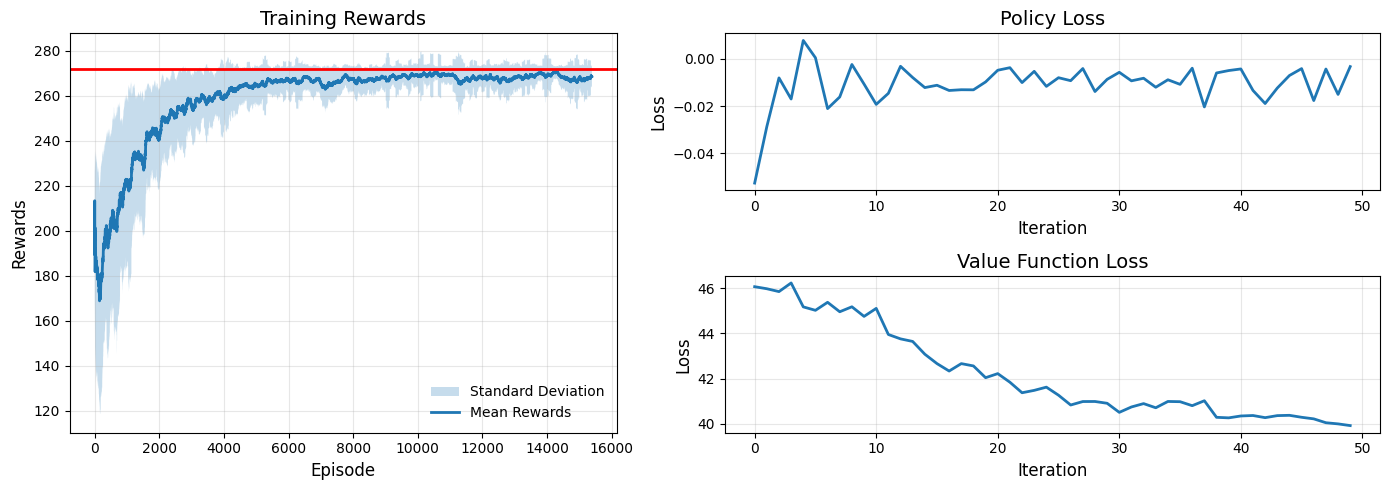

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(14, 5))
gs = fig.add_gridspec(2, 3, width_ratios=[2, 1, 1], height_ratios=[1, 1])

# Left: Training Rewards
ax0 = fig.add_subplot(gs[:, 0])
ax0.fill_between(np.arange(len(mean_rewards)),
                 mean_rewards - std_rewards,
                 mean_rewards + std_rewards,
                 label='Standard Deviation', alpha=0.25)
ax0.plot(mean_rewards, label='Mean Rewards', linewidth=2)
ax0.axhline(y=max_value, color='r', linewidth=2)
ax0.set_ylabel('Rewards', fontsize=12)
ax0.set_xlabel('Episode', fontsize=12)
ax0.set_title('Training Rewards', fontsize=14)
ax0.legend(loc='lower right', frameon=False)
ax0.grid(alpha=0.3)

# Top-right: Policy Loss
ax1 = fig.add_subplot(gs[0, 1:])
ax1.plot(pol_loss, linewidth=2)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_title('Policy Loss', fontsize=14)
ax1.grid(alpha=0.3)

# Bottom-right: Value Function Loss
ax2 = fig.add_subplot(gs[1, 1:])
ax2.plot(vf_loss, linewidth=2)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_title('Value Function Loss', fontsize=14)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
\
**ü•≥üéâCongratulate! You've completed the tutorial.**

For the sake of time, we limited the number of items to 8.

However, you can fully utilize the given dataset by increasing N to 200.

Keep in mind that this will require significantly more training time and iterations.

If you do so, you‚Äôll obtain a plot similar to the one below.

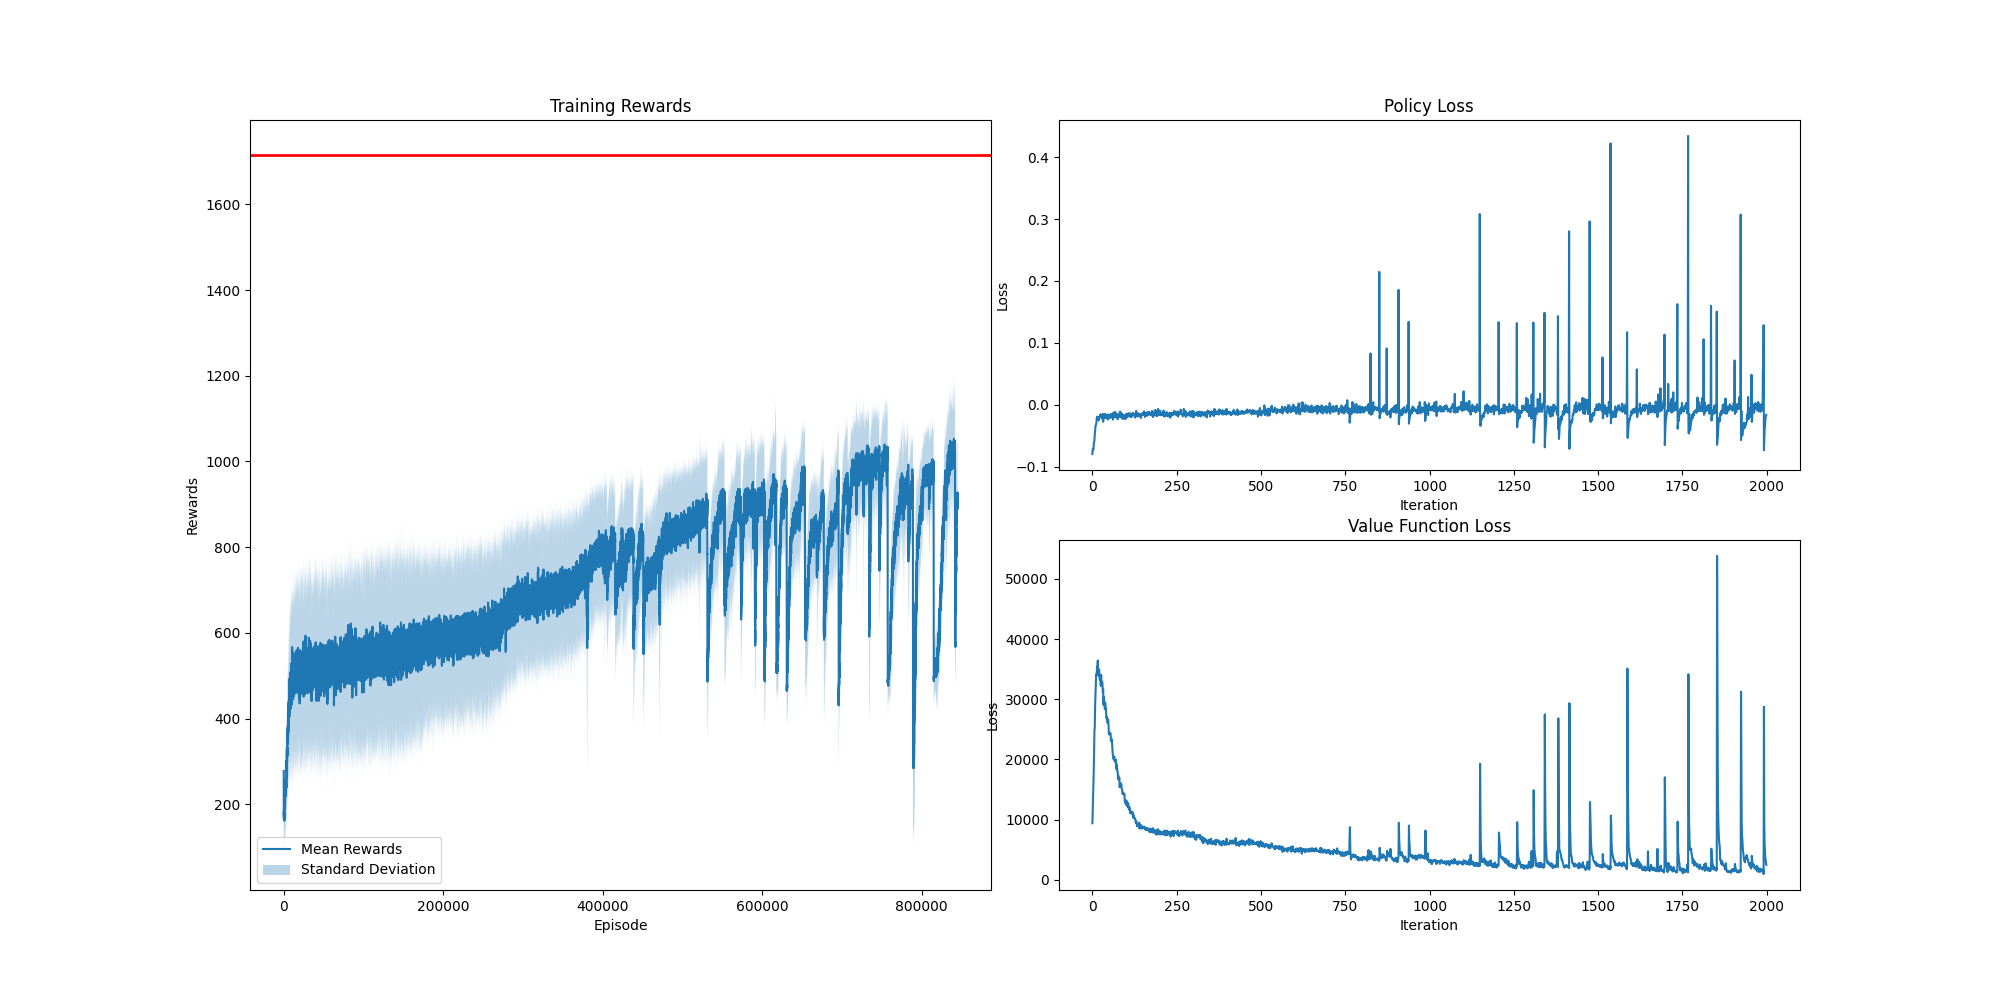